# Rainfall Prediction - Training a Binary Classifier
## Exploratory Data Analysis
As in the last notebook we need to load in the libraries, and data, we will be using. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

rainfall = pd.read_csv("weatherAUS.csv")

The next step in the project is to explore our target variable (RainTomorrow). We saw in the previous notebook that this variable is categorical i.e. of datatype "object". We can see how many observations are absent from our recorded data for the target variable by using the pandas function `isnull`, and the builtin `sum`.

In [2]:
sum(rainfall['RainTomorrow'].isnull())

3267

We can also find out other important information about the target variable such as the number of unique values, and the distribution of the values as follows. 


In [3]:
rainfall.nunique()

Date             3436
Location           49
MinTemp           389
MaxTemp           505
Rainfall          681
Evaporation       358
Sunshine          145
WindGustDir        16
WindGustSpeed      67
WindDir9am         16
WindDir3pm         16
WindSpeed9am       43
WindSpeed3pm       44
Humidity9am       101
Humidity3pm       101
Pressure9am       546
Pressure3pm       549
Cloud9am           10
Cloud3pm           10
Temp9am           441
Temp3pm           502
RainToday           2
RainTomorrow        2
dtype: int64

In [5]:
freq = rainfall['RainTomorrow'].value_counts()
freq

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

In [6]:
freq_percent = freq*100/sum(freq)
freq_percent

No     77.581878
Yes    22.418122
Name: RainTomorrow, dtype: float64

We can even visualise the distribution by plotting it as a countplot. 

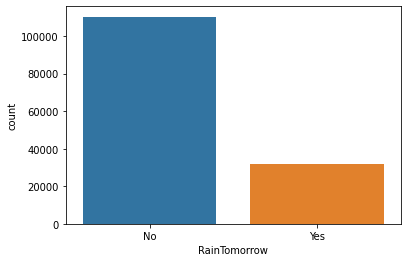

In [7]:
sns.countplot(x=rainfall['RainTomorrow']);

So we can perform useful arithmetic operations on our data we'll also convert the yes/no values for our RainTomorrow variables to $1/0$ as follows.

In [8]:
rainfall['RainTomorrow'] = rainfall['RainTomorrow'].replace(['Yes','No'],['1','0'])

We can also extract the date column into year, month, and day columns to make it easier to analyse cyclical patterns in our data as shown below. 

In [9]:
rainfall['Date'] = pd.to_datetime(rainfall['Date'])
rainfall['Year'] = rainfall['Date'].dt.year
rainfall['Month'] = rainfall['Date'].dt.month
rainfall['Day'] = rainfall['Date'].dt.day
rainfall.drop(columns=['Date'])

AttributeError: Can only use .dt accessor with datetimelike values

We can now analyse the correlation between are numerical variables (which now include day, month and year) and all of our other variables by using the pandas function `corr`.

In [ ]:
rainfall.corr()

We can also represent this information graphically using a heatmap as shown below. 

In [ ]:
sns.heatmap(rainfall.corr());